In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [281]:
train= pd.read_csv(r"C:\Users\Ravi\Downloads\titanic\train.csv")

In [282]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Miss. Ingeborg Constanzia",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [284]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [285]:
x= train.drop("Survived",axis=1)

In [286]:
y= train["Survived"]

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 40, stratify = y)

In [289]:
train_x.shape

(668, 11)

In [290]:
test_x.shape

(223, 11)

# Univariate Analysis

In [291]:
train_x["Sex"].value_counts()

male      432
female    236
Name: Sex, dtype: int64

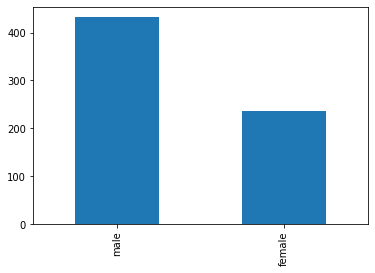

In [292]:
train_x["Sex"].value_counts().plot(kind="bar")

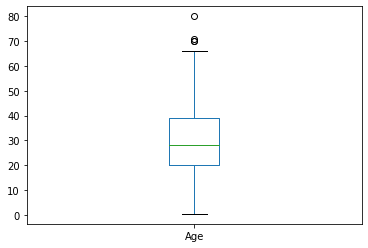

In [293]:
train_x["Age"].plot.box()

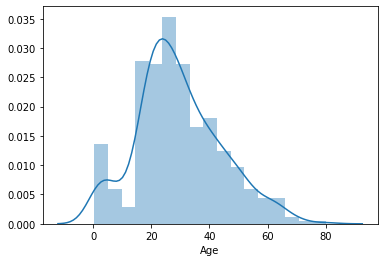

In [294]:
sns.distplot(train_x["Age"], hist = True, kde=True)

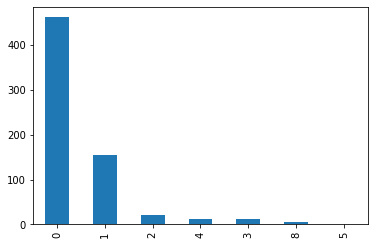

In [295]:
train_x["SibSp"].value_counts().plot.bar()


In [296]:
train_x["Pclass"].value_counts()

3    376
1    158
2    134
Name: Pclass, dtype: int64

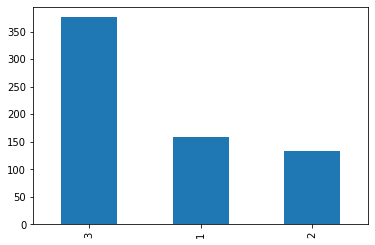

In [297]:
train_x["Pclass"].value_counts().plot.bar()

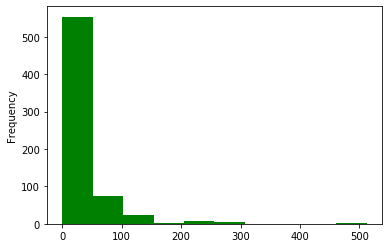

In [298]:
train_x["Fare"].plot.hist(color="Green")

In [299]:
train_x["Cabin"].value_counts().sum()

147

In [300]:
train_x["Cabin"].isna().value_counts()

True     521
False    147
Name: Cabin, dtype: int64

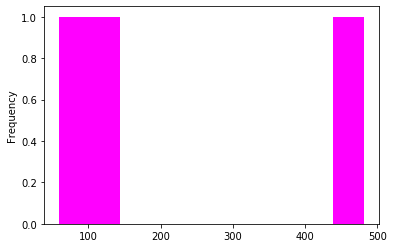

In [301]:
train_x["Embarked"].value_counts().plot.hist(color= "Magenta")

### Checking for missing values

In [302]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          521
Embarked         1
dtype: int64

Therefore values from "Age" and "Cabin" are missing, which are needed to be taken care of.

In [303]:
mn= train["Age"].mean()

In [304]:
train["Age"]=train_x["Age"].replace(np.nan,mn,inplace = True)

Here new methods has to checked after building the model.
1. Dropping the rows
2. Creating a new dimension

In [305]:
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
660,661,1,"Frauenthal, Dr. Henry William",male,50.000000,2,0,PC 17611,133.6500,NaN,S
576,577,2,"Garside, Miss. Ethel",female,34.000000,0,0,243880,13.0000,NaN,S
158,159,3,"Smiljanic, Mr. Mile",male,29.699118,0,0,315037,8.6625,NaN,S
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.000000,1,0,A/5. 3336,16.1000,NaN,S
407,408,2,"Richards, Master. William Rowe",male,3.000000,1,1,29106,18.7500,NaN,S


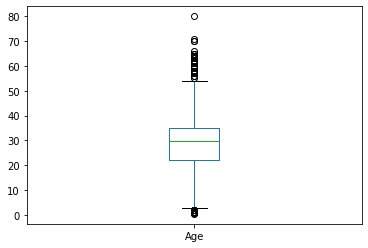

In [306]:
train_x["Age"].plot.box()

## Bivariate Analysis

In [307]:
train_x.shape 

(668, 11)

In [308]:
test_x.shape

(223, 11)

In [309]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [310]:
sex_sur=pd.crosstab(train_x["Sex"],train_y)

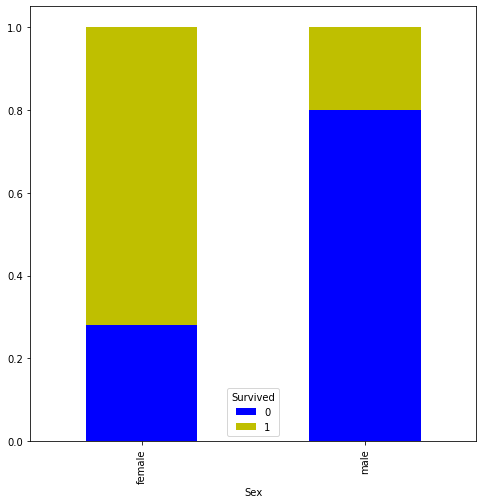

In [311]:
sex_sur.div(sex_sur.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(8,8),color="BYl")

Chances of female survival are more than the males

In [312]:
p_sur=pd.crosstab(train_x["Pclass"],train_y)

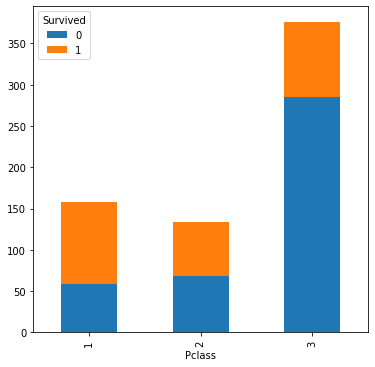

In [313]:
p_sur.plot.bar(stacked=True,figsize=(6,6))

In [314]:
age_fare=pd.crosstab(train_x["Age"],train_x["Fare"])

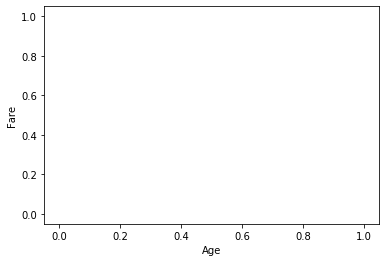

In [315]:
train.plot.scatter("Age","Fare")
plt.show()

In [316]:
train_x["Age"].dtype

dtype('float64')

In [317]:
#age Fare relation
train["Age"].corr(train_x["Fare"])

nan

Therefore Age and Fare are not much related.

In [318]:
#Age and survival
train_x["Age"].corr(train_y)

-0.10188494983187488

In [319]:
#fare and survival
train_x["Fare"].corr(train_y)

0.25569898233277427

In [320]:
train_x["Pclass"].corr(train_y)

-0.3386341552390735

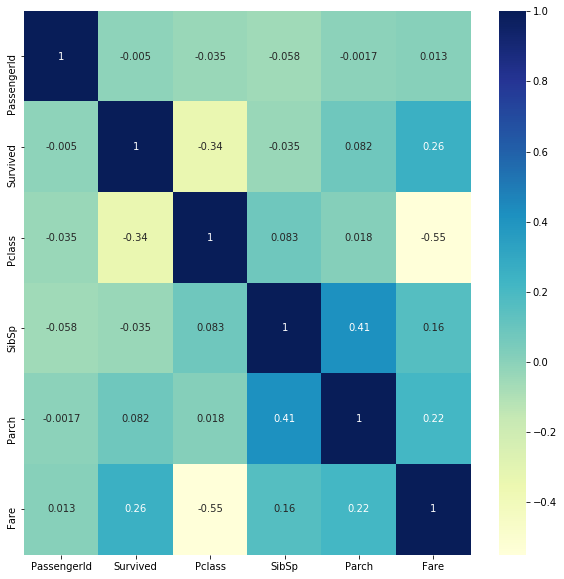

In [321]:
corr= train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,annot=True,cmap="YlGnBu")

## Model Building

### Logistic Regression

In [322]:
trainn=train.drop(["Survived"],axis=1)
trainn=train.drop(["Cabin"],axis=1)
target=train["Survived"]

In [323]:
trainn=pd.get_dummies(trainn)

In [324]:
trainn.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [325]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [326]:
trainn=trainn.drop(["Survived"],axis=1)

In [327]:
trainn.head()

,PassengerId,Pclass,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,0,7.2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,0,0,7.9250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,0,0,8.0500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [328]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [329]:
train_X,test_X,train_Y,test_Y = train_test_split(trainn,target,test_size=0.3,random_state = 4)

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
lrg=LogisticRegression()

In [332]:
test_X.head()

,PassengerId,Pclass,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
646,647,3,0,0,7.8958,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
876,877,3,0,0,9.8458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
359,360,3,0,0,7.8792,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194,195,1,0,0,27.7208,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
819,820,3,3,2,27.9000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [333]:
lrg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [334]:
pred=lrg.predict(test_X)

In [335]:
pred.shape

(268,)

In [336]:
from sklearn.metrics import accuracy_score

In [337]:
accuracy_score(test_Y,pred)

0.8134328358208955

## Decision Tree

In [338]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
clf=DecisionTreeClassifier(max_depth=16,random_state=40)

In [340]:
clf.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [341]:
pred1=clf.predict(test_X)

In [342]:
accuracy_score(test_Y,pred1)

0.8507462686567164

### After tuning the parameters a an accuracy of 85.07% is achieved.

In [343]:
#predicting on training data set
pre=clf.predict(train_X)

In [344]:
accuracy_score(train_Y,pre)

0.9775280898876404

### On predicting on the dataset an accuracy of 97.75% is achieved.

#### Working with Test Data Set

In [345]:
test_set=pd.read_csv(r"C:\Users\Ravi\Downloads\titanic\test.csv")

In [346]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [347]:
test_set["Age"].replace(np.nan,mn,inplace=True)

In [348]:
test_set.drop(["Cabin"],axis=1,inplace= True)

In [349]:
test1=pd.get_dummies(test_set)

In [350]:
test_set[test_set["Fare"].isna()]= 8

In [351]:
test_set.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [352]:
train_X.shape

(623, 1582)

In [353]:
test1.shape

(418, 792)

In [354]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [355]:
test_set.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# New Attempt

In [356]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,NaN,S


In [357]:
features=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [358]:
df=train[features]

In [359]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,None,1,0,7.2500,S
1,1,female,None,1,0,71.2833,C
2,3,female,None,0,0,7.9250,S
3,1,female,None,1,0,53.1000,S
4,3,male,None,0,0,8.0500,S


In [360]:
df["Age"].replace(np.nan,mn,inplace=True)

In [361]:
df.shape

(891, 7)

In [362]:
df1=pd.get_dummies(df)

In [363]:
df1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,29.699118,1,0,7.2500,0,1,0,0,1
1,1,29.699118,1,0,71.2833,1,0,1,0,0
2,3,29.699118,0,0,7.9250,1,0,0,0,1
3,1,29.699118,1,0,53.1000,1,0,0,0,1
4,3,29.699118,0,0,8.0500,0,1,0,0,1


In [364]:
df1.shape

(891, 10)

In [365]:
trn_x,tst_x,trn_y,tst_y=train_test_split(df1,target,test_size=0.3)

In [366]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [447]:
Input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(degree=2,include_bias=False)),("mode",LogisticRegression(random_state=10,n_jobs=1))]

In [448]:
pipe=Pipeline(Input)

In [449]:
pipe.fit(trn_x,trn_y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('mode',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=1, penalty='l2',
                                    random_state=10, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [450]:
pred_val=pipe.predict(tst_x)

In [451]:
accuracy_score(pred_val,tst_y)

0.7910447761194029

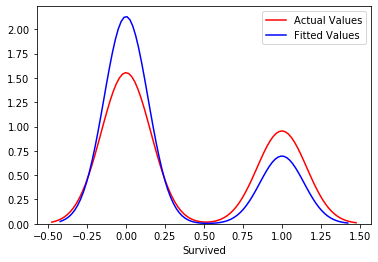

In [372]:
ax1=sns.distplot(tst_y,hist=False,color="r",label="Actual Values")
sns.distplot(pred_val,hist=False, color='b',label="Fitted Values")

In [452]:
tpr=pipe.predict(trn_x)

In [453]:
accuracy_score(tpr,trn_y)

0.8218298555377207

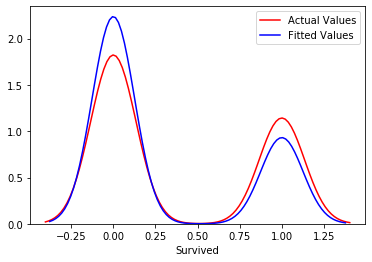

In [375]:
ax1=sns.distplot(trn_y,hist=False,color="r",label="Actual Values")
sns.distplot(tpr,hist=False, color='b',label="Fitted Values")

# Trying Decision Tree 

In [437]:
Input1=[("scale",StandardScaler()),
        ("polynomial",PolynomialFeatures(degree=2,include_bias=False)),
        ("mode",DecisionTreeClassifier(max_depth=16,random_state=40))]

In [438]:
pipe1=Pipeline(Input1)

In [439]:
pipe1.fit(trn_x,trn_y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('mode',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=16,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=40,
                                        splitter='best'))],
         verbose=False)

In [440]:
yhat=pipe1.predict(tst_x)

In [441]:
accuracy_score(yhat,tst_y)

0.8022388059701493

In [442]:
yhat1=pipe1.predict(trn_x)

In [443]:
accuracy_score(yhat1,trn_y)

0.92776886035313

# Grid SeacrhCV

In [444]:
from sklearn.model_selection import GridSearchCV

In [454]:
dtc=DecisionTreeClassifier()

In [455]:
para=[{"max_depth":[10,20,30,40,50,60]}]

In [456]:
Grid1= GridSearchCV(dtc,para,cv=4)

In [457]:
Grid1.fit(trn_x,trn_y)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60]}],
           

In [462]:
score=Grid1.cv_results_

In [464]:
score['mean_test_score']

array([0.79615385, 0.78171009, 0.78011787, 0.78011787, 0.78972291,
       0.78172043])

# Trying Cross Val Score

In [466]:
from sklearn.model_selection import cross_val_score

In [468]:
scores= cross_val_score(lr,trn_x,trn_y,cv=3)

In [ ]:
scores1=cross_val_score(lr,t)

In [470]:
np.mean(scores)

0.8025749411618976